In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import os
import sklearn
from sklearn.model_selection import train_test_split

In [4]:
BATCH_SIZE = 50
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [27]:
dataset_train = tf.keras.preprocessing.image_dataset_from_directory(
    "plant_images/train",
    shuffle=True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)
dataset_valid = tf.keras.preprocessing.image_dataset_from_directory(
    "plant_images/valid",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)
dataset_test = tf.keras.preprocessing.image_dataset_from_directory(
    "plant_images/test",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2163 files belonging to 11 classes.
Found 55 files belonging to 11 classes.
Found 55 files belonging to 11 classes.


In [6]:
class_names = dataset_train.class_names
class_names

['Alstonia Scholaris',
 'Arjun',
 'Basil',
 'Chinar',
 'Gauva',
 'Jamun',
 'Jatropha',
 'Lemon',
 'Mango',
 'Pomegranate',
 'Pongamia']

In [7]:
print(len(dataset_train))
print(len(dataset_valid))
print(len(dataset_test))

44
2
2


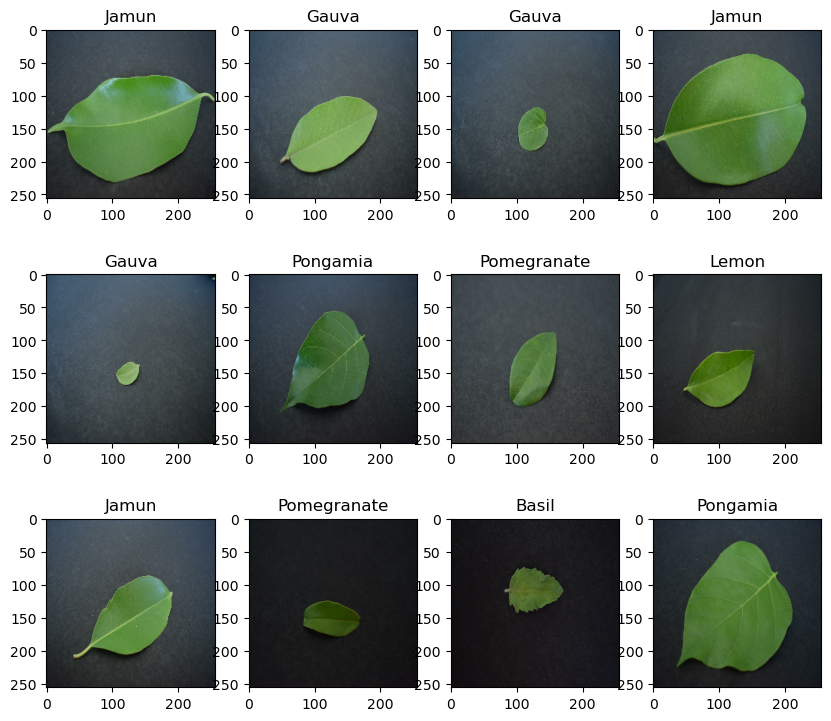

In [8]:
plt.figure(figsize=(10, 9))
for image_batch, labels_batch in dataset_train.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i].numpy()])

In [9]:
dataset_train = dataset_train.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
dataset_valid = dataset_valid.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
dataset_test = dataset_test.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"), 
  layers.RandomRotation(0.2),
])

In [10]:
dataset_train = dataset_train.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [11]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 11

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)
model.build(input_shape=input_shape)
model.summary()

C:\Users\evanf\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (50, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (50, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (50, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (50, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (50, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (50, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (50, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (50, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (50, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (50, 12544)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (50, 64)                    │         802,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (50, 11)                    │             715 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 896,843 (3.42 MB)

 Trainable params: 896,843 (3.42 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(
    dataset_train,
    batch_size=BATCH_SIZE,
    validation_data=dataset_valid,
    verbose=1,
    epochs=50
)

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.1696 - loss: 2.2789 - val_accuracy: 0.2909 - val_loss: 2.0950
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.4556 - loss: 1.5404 - val_accuracy: 0.4364 - val_loss: 1.6836
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.6070 - loss: 1.1734 - val_accuracy: 0.4727 - val_loss: 1.5727
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.6616 - loss: 1.0313 - val_accuracy: 0.5636 - val_loss: 1.2274
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.6964 - loss: 0.9214 - val_accuracy: 0.6000 - val_loss: 1.0086
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.7344 - loss: 0.8308 - val_accuracy: 0.6545 - val_loss: 0.9009
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.7746 - loss: 0.6820 - val_accuracy: 0.6909 - val_loss: 0.8235
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.8206 - loss: 0.5483 - val_accuracy: 0.7273 - val_loss

In [13]:
model.save("mainmode.h5")

In [15]:
scores = model.evaluate(dataset_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.9248 - loss: 0.2017


In [16]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 44}

In [17]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

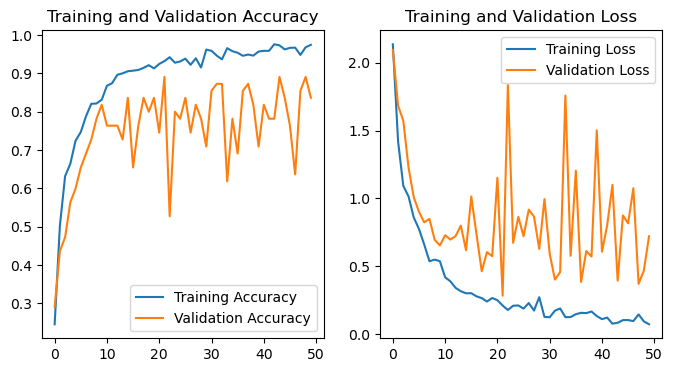

In [47]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


ValueError: num must be an integer with 1 <= num <= 2, not 3

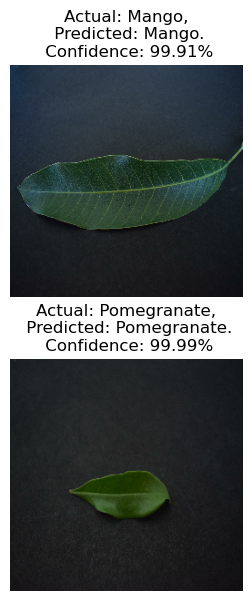

In [59]:
plt.figure(figsize=(3, 7))
for images, labels in dataset_test:
    for i in range(9):
        ax = plt.subplot(2, 1, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [39]:
import seaborn as seaborn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
true_labels = []
predicted_labels = []

for images, labels in dataset_test:
    for i in range(len(labels)):
        predicted_class, _ = predict(model, images[i])
        true_labels.append(int(labels[i]))
        predicted_labels.append(class_names.index(predicted_class))
    
    break 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

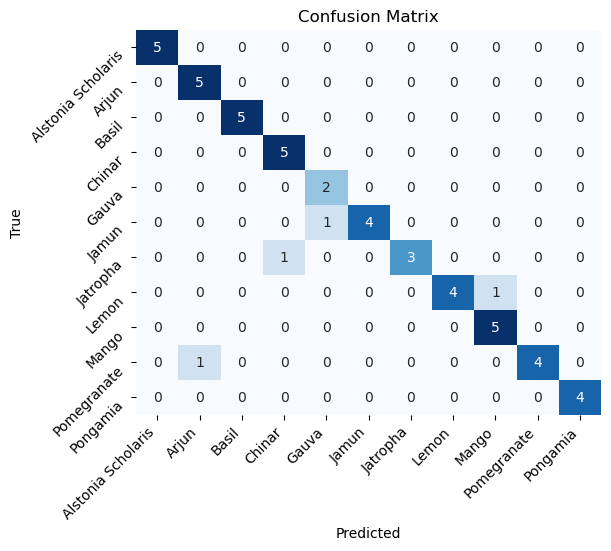

In [43]:
cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(6, 5))
seaborn.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, va='top')
plt.show()

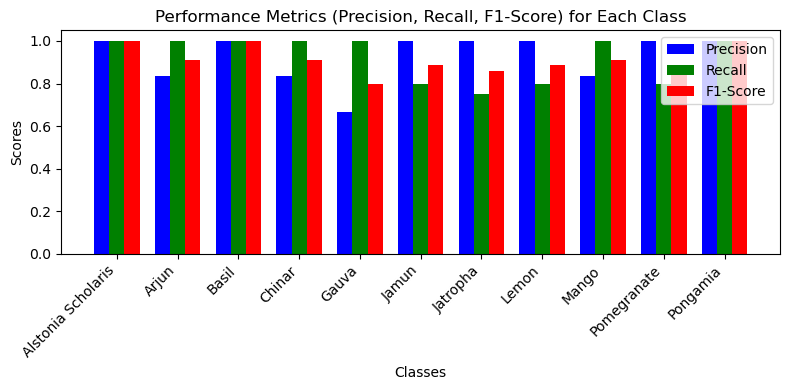

In [45]:
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predicted_labels, average=None)

# Create a bar chart for Precision, Recall, and F1-Score for each class
class_count = len(class_names)  # Number of classes
x = np.arange(class_count)  # Class indices

# Create the figure and axes for plotting
fig, ax = plt.subplots(figsize=(8, 4))

# Plot Precision, Recall, and F1-Score
bar_width = 0.25  # Width of the bars
plt.bar(x - bar_width, precision, bar_width, label='Precision', color='b')
plt.bar(x, recall, bar_width, label='Recall', color='g')
plt.bar(x + bar_width, f1, bar_width, label='F1-Score', color='r')

# Add labels, title, and legend
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics (Precision, Recall, F1-Score) for Each Class')
ax.set_xticks(x)
ax.set_xticklabels(class_names, rotation=45, ha='right')
ax.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()